# Linear SVM

In [ ]:
import matplotlib.pyplot as plt
import numpy as  np
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris(as_frame = True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target

setosa_or_versicolor = (y==0)|(y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
# support vector classifier
svm_clf = SVC(kernel = 'linear')
svm_clf.fit(X,y)

SVC(kernel='linear')

In [ ]:
svm_clf.score(X,y)

1.0

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)



In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

1.0

In [ ]:
log_reg = SVC()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

1.0

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris(as_frame = True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target==2)

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [ ]:
X_new = [[5.5,1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [ ]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

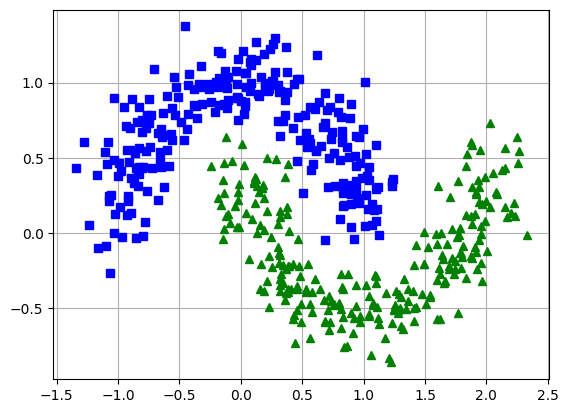

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X, y = make_moons(n_samples = 500, noise = 0.15, random_state = 42)

plt.plot(X[:, 0][y==0], X[:,1][y==0], 'bs')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')
plt.grid()
plt.show();

In [ ]:
svm_clf.fit(X,y)
svm_clf.score(X,y)

0.866

In [ ]:
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X,y)
polynomial_svm_clf.score(X,y)

1.0

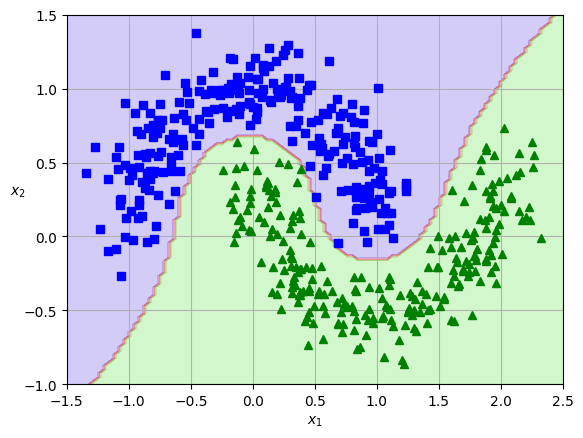

In [ ]:
def plot_dataset(X,y,axes):
  plt.plot(X[:, 0][y==0], X[:,1][y==0], 'bs')
  plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')
  plt.axis(axes)
  plt.grid(True)
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$', rotation=0)

def plot_predictions(clf,axes):
  x0s= np.linspace(axes[0], axes[1],100)
  x1s = np.linspace(axes[2], axes[3],100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [ ]:
from sklearn.svm import SVC

poly_kernerl_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=3, coef0=1, C=5))

poly_kernerl_svm_clf.fit(X,y)
poly_kernerl_svm_clf.score(X,y)

0.996

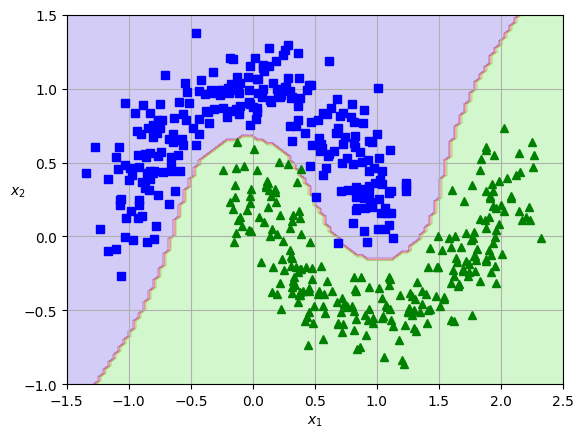

In [ ]:
plot_predictions(poly_kernerl_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [ ]:
rbf_kernel_clf_svm = make_pipeline(
    StandardScaler(),
    SVC(kernel = 'rbf', gamma=5, C=0.001))
rbf_kernel_clf_svm.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

# SVR

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = 2*np.random.rand(1000,1)
y = 4+3*X[:,0]+np.random.randn(1000)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
svm_reg = make_pipeline(StandardScaler(),
                       LinearSVR(random_state=42))
svm_reg.fit(X_train, y_train)
svm_reg.score(X_test, y_test)

0.7731636429225334